<h1>Cosas numéricas de repaso</h1>

<h3>Método de Euler de diferencias finitas para derivadas</h3>

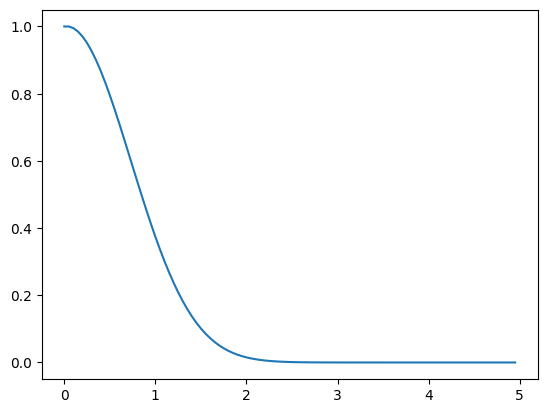

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T = 5
t0 = 0
N = 100
h = (T-t0)/N
x0 = 1

t = np.arange(t0,T,h)
x = np.zeros(N)

for k in range(len(x)-1):
    x[0] = x0
    x[k+1] = x[k]+h*(-2*x[k]*t[k])

plt.plot(t,x)

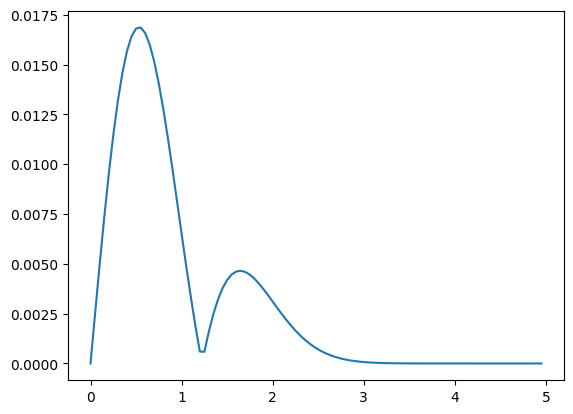

In [2]:
#Plot del error absoluto

xreal = np.exp(-t**2)
errores = []
for k in range(len(x)):
    errores.append(abs(xreal[k]-x[k]))

plt.plot(t,errores)

<h1>Perfil de Bates y distribución de densidades heterosféricas</h1>

El perfil de temperaturas para la alta atmósfera neutra está bien modelado por el perfil de Bates:

$$T = T_{oo}-(T_{oo}-T(h_0))e^{-s(z-z_0)} $$

con $h_0 = 120/km$, $s = 0.021/km$, $T(h_0) = 350K$, $T_{oo} = 1000 K$. La distribución de densidades para cada gas es:

$$n_i(h) = n(h_0)\frac{T(h_0)}{T(h)}e^{-\int_{h_0}^h \frac{dz}{H_i(z)}}$$

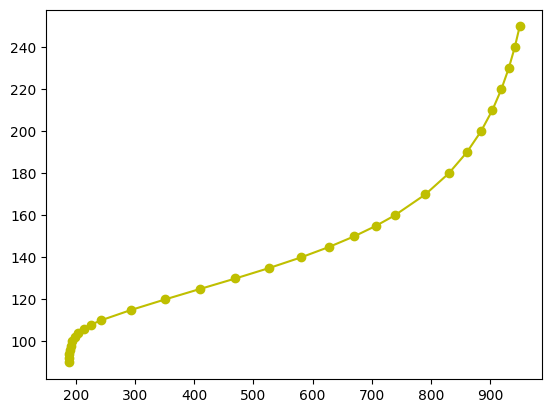

In [3]:
import matplotlib.pyplot as plt

#Datos reales de temperaturas en la alta atmosfera neutra (Ver libro Prolls, atrás de todo)
T = [188,188.1,188.5,189.4,191.0, 193.7,197.9,204.3,213.4,225.8,241.7,293.2,350.5,409.8,469.6,526.9,580.0,627.7,669.8,706.6,738.5,790.4,829.9,860.4,884.4,903.5,918.8,931.3,941.5,949.9]
z = [90,92,94,96,98,100,102,104,106,108,110,115,120,125,130,135,140,145,150,155,160,170,180,190,200,210,220,230,240,250]
plt.plot(T,z,"y-o")

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib qt5

Too = 1000 #K
z0 = 120000 #m
s = 2.1e-5 #1/m
To = 360 #K

m = [6.6e-27,6.63e-26, 2*2.65e-26, 2*2.32e-26, 2.65e-26] #masas elementos en kilgramos He, Ar, O2, N2, O.
n0 = [10**(13.4),10**(15.2),10**(16.6),10**(17.6),10**(17.0)]
g0 = 8.8 #m/s^2
K = 1.38e-23 #m^2 kg/ s^2 K

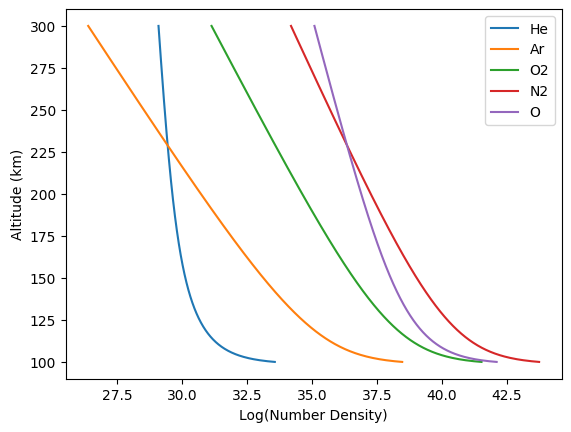

In [5]:
z = np.linspace(100000, 300000, 1000)  # Array of altitudes in meters

n = []  # Empty list to store number densities for different species

# Array of element names corresponding to each species
element_names = ['He', 'Ar', 'O2', 'N2', 'O']

for k in range(len(m)):
    # Number density calculation using the given formula
    n_k = (n0[k] * To * np.exp(s * (z - z0)) * np.exp(-(m[k] * g0 / (Too * K)) * (z - z0))) / (
            To - Too * (1 - np.exp(s * (z - z0)))) * (
                  (Too - (Too - To) * np.exp(-s * (z - z0))) / To) ** (-m[k] * g0 / (Too * K))

    n.append(n_k)  # Append the calculated number density to the list

    # Plot the number density profile for each species with element name as legend
    plt.plot(np.log(n_k), z / 1000, label=element_names[k])

# Display the plot with legend
plt.xlabel('Log(Number Density)')
plt.ylabel('Altitude (km)')
plt.legend()
plt.show()

<h3>Distribución de oxígeno atómico</h3>

Text(0, 0.5, 'Altura km')

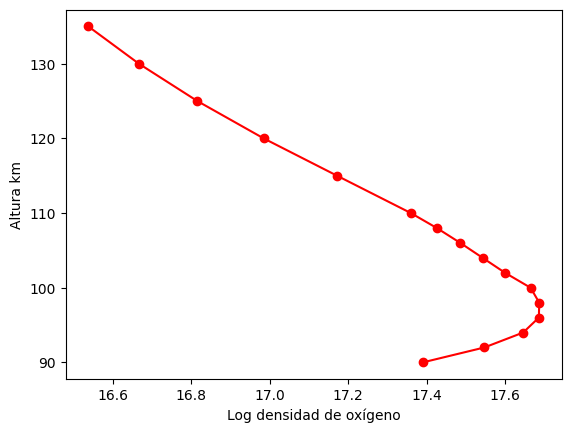

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n_o = [17.390,17.547,17.646,17.686,17.687,17.665,17.600, 17.543, 17.486, 17.426, 17.360, 17.172, 16.985, 16.816, 16.667, 16.538]
h = [90,92,94,96,98,100,102,104,106,108,110,115,120,125,130,135]

plt.plot(n_o,h, "r-o")
plt.xlabel("Log densidad de oxígeno")
plt.ylabel("Altura km")

<h1>Ejercicio: Satélite orbitando en un gas de partículas</h1>

Un satélite esférico de masa $m=100kg$ y radio $r=1m$ orbita la tierra a una altura de $300km$ sobre el plano ecuatorial. 

a) Mostremos que el número de Knudsen ($\approx$ camino libre medio sobre dimensión del satélite) a esa altura es mucho mayor a $1$.

Supongamos que a la altura de 300km, el gas es puramente oxígeno, con lo cual tenemos una pelota de radio 1 metro colisionando con pelotitas de radio $r_o = 48\times 10^{-12}m$, o sea, 48pm. La densidad de oxígeno a esta altura es 

$$n_o(300km) = 10^{15} m^{-3}$$

El número de Knudsen es $K_n=\frac{\lambda_{s,o}}{2m}$. Hay que hallar la longitud de camino libre medio del satélite.

$$\lambda_{S,o} = \frac{1}{(n_o \sigma_{S,o})}=\frac{1}{(10^{15} m^{-3}\times \pi(2\times 48\times 10^{-12} m)^2 } $$

In [7]:
import numpy as np

n_o = 1e15 #m^-3
r = 48e-12 #m

Lambda = 1/(n_o*np.pi*(2*r)**2) #m
Lambda

34538.83313626201

$$\lambda_{S,o} = 34538m $$

Este es el camino libre medio del satélite en un gas de oxígeno de densidad $n_o$ a 300km de altura. Entonces el número de Knudsen es:

$$K_n = \frac{35000m}{2m} = 17500$$

b) Calculemos la velocidad del satélite así como el período orbital y su energía cinética total.

In [8]:
G = 6.67e-11 #SI
M = 5.97e24 #kg
Re = 6371000
r = 300000+Re #m

v = np.sqrt(G*M/r)
v

7725.998370241155

$$v = 7.7 km/s $$



<h1>SEGUIR</h1>

<h1>Espectro solar</h1>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

h, k, c, T, l,f,x = symbols("h, k, c, T, l, f, x")
f = 2*pi*h/c**2*(k*T/h)**4*x**3*(1/(exp(x))-1)

integrate(f,(x,0, oo))

Piecewise((12*pi*T**4*k**4/(c**2*h**3), Ne(c**2*h**3, 0)), (oo*sign(T**4*k**4/(c**2*h**3)), True)) - oo*sign(T**4*k**4/(c**2*h**3))

In [10]:
k = 1.38e-23 #SI
c = 300000000 #m/s
h = 2*np.pi*1.05e-34 #SI

sigma = 12*np.pi*k**4/(c**2*h**3)
sigma

5.290508940250578e-08

In [11]:
A = 4*np.pi*(600000000)**2
T = (3.86e26/(A)/sigma)**(1/4)
T

6337.155615533411

------------

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

Rt = 6370000 #Radio Terrestre en m
Mt = 5.97e24  #Masa de la Tierra en kg
G = 6.67e-11 #N m^2/kg^2
k = 1.38e-23  #kte Boltzmann en SI
M = 28
z = np.arange(0,10000)  #m
#g = Mt*G/(Rt+z)**2
g = 9.8 
T = 288-10/1000*z
H = k*T/(M*g)

z0 = 0
p0 = 1

integral = integrate.cumtrapz(1/H,z,initial=1)

p = 1011*np.exp(-integral)

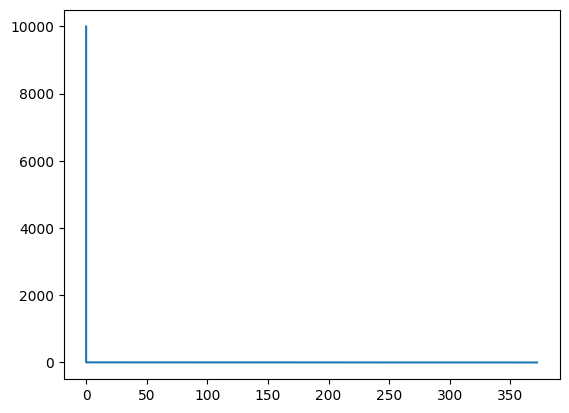

In [67]:
plt.plot(p,z)